In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import cv2

In [3]:
im='chest_xray/train/NORMAL/IM-0115-0001.jpeg'

In [4]:
imgh= cv2.imread(im)

In [5]:
imgh.shape

(1858, 2090, 3)

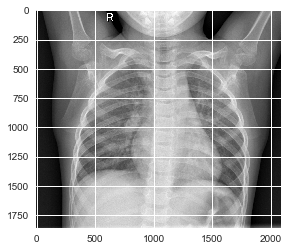

In [6]:
plt.imshow(imgh,cmap='Greys')

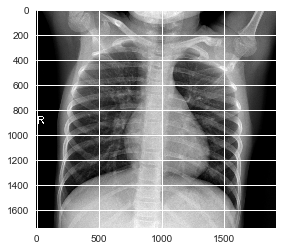

In [7]:
plt.imshow(cv2.imread('chest_xray/train/NORMAL/IM-0467-0001-0001.jpeg'),cmap='Greys')

In [8]:
folder='chest_xray/train'
os.listdir(folder)

['NORMAL', 'PNEUMONIA']

In [9]:
def path_extractor(PATH,trgt_dir):
    paths = [] # Stores Image file paths
    cls_labels = [] # Stores Class labels
    folder = PATH+trgt_dir
    for root,dirs,files in os.walk(folder):
        for file in files:
            if file.endswith(".jpeg"):
                f_path = os.path.join(root, file)
                newPath = f_path.replace(os.sep, '/')
                paths.append(newPath)
                label = newPath.split('/')[-2]
                cls_labels.append(label)
                
    return paths,cls_labels

In [10]:
train_img_path,y_train = path_extractor('chest_xray/','train')
test_img_path,y_test = path_extractor('chest_xray/','test')

chest_xray/train/NORMAL/IM-0115-0001.jpeg


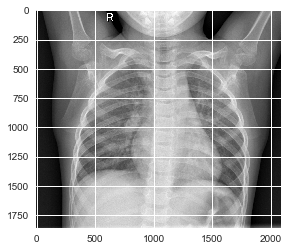

In [11]:
print(train_img_path[0])
plt.imshow(cv2.imread(train_img_path[0]),cmap='Greys')

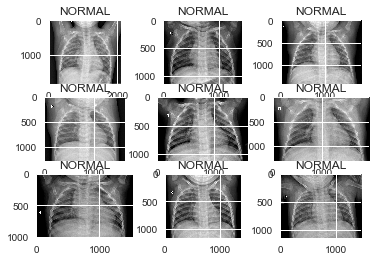

In [12]:
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.title(y_train[i])
    plt.imshow(cv2.imread(train_img_path[i]),cmap='Greys')

In [13]:
IMAGE_SIZE = (150,150)
# currImg_BGR = cv2.imread(paths[0])
# b,g,r = cv2.split(currImg_BGR)
# currImg_RGB = cv2.merge([r,g,b])
# currImg = cv2.resize(currImg_RGB,IMAGE_SIZE)
def images_extractor(paths):
    images=[]
    for i in paths:
        img = cv2.imread(i)
        re_img = cv2.resize(img,IMAGE_SIZE)
        images.append(re_img)
    return images

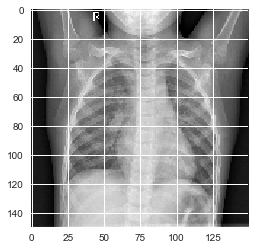

In [14]:
x_train = images_extractor(train_img_path)
plt.imshow(x_train[0],cmap='Greys')

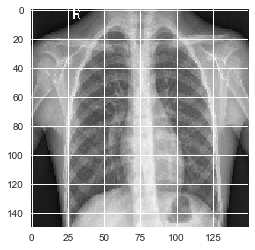

In [15]:
x_test = images_extractor(test_img_path)
plt.imshow(x_test[0],cmap='Greys')

In [16]:
# To get unique values from list
print(list(set(y_train)))
print(list(set(y_test)))

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [ ]:
x_train

In [ ]:
x_train_a = np.array(x_train)
x_train_a

In [19]:
y_train_a = np.array(y_train)
y_train_a

array(['NORMAL', 'NORMAL', 'NORMAL', ..., 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA'], dtype='<U9')

In [20]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [21]:
x_train_a.shape,x_test.shape,y_train_a.shape,y_test.shape

((5216, 150, 150, 3), (624, 150, 150, 3), (5216,), (624,))

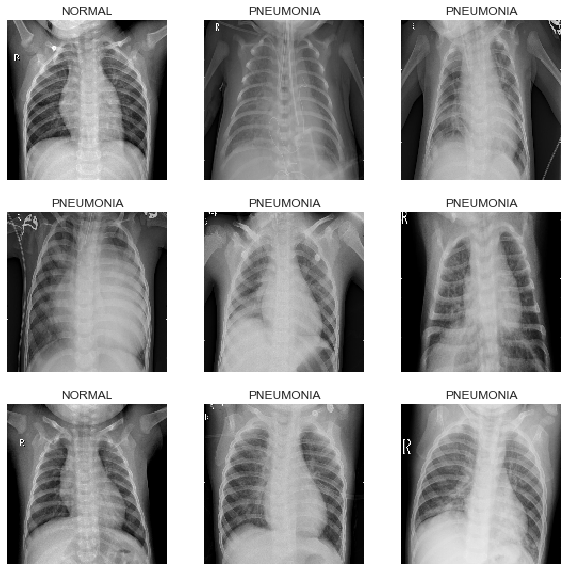

In [22]:
plt.figure(figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    random_num = np.random.randint(0,len(x_train))
    plt.title(y_train[random_num])
    plt.imshow(x_train[random_num][:,:,:])
    plt.grid(False)
    plt.axis('off')

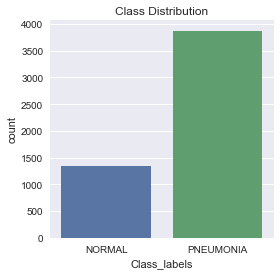

In [23]:
# Checking distribution of classes in train set
y_train_df = pd.DataFrame(y_train_a,columns=["Class_labels"])
plt.figure(figsize=(4,4))
plt.title("Class Distribution")
sns.countplot(x='Class_labels',data=y_train_df)
plt.show()

In [24]:
y_train_df['Class_labels'].value_counts() 

PNEUMONIA    3875
NORMAL       1341
Name: Class_labels, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_val, y_train, y_val = train_test_split(x_train_a, y_train_a, test_size=0.2, random_state=5)

In [27]:
print("Shape of train set",x_train.shape)
print("Shape of validation set",x_val.shape)
print("Shape of test set",x_test.shape)

Shape of train set (4172, 150, 150, 3)
Shape of validation set (1044, 150, 150, 3)
Shape of test set (624, 150, 150, 3)


# Normalization

The Pixel Values are often stored as Integer Numbers in the range 0 to 255, the range that a single 8-bit byte can offer.

Normalization is performed on the Dataset to Scale the values within a Range. [0,1]

This helps Gradient Descent to Converge much faster.

Normalization is important to bring all the features to equal level and give all of them equal weigthage.

Normalization helps remove distortions caused by Light and Shadows in an Image.
Normalization is carried out as follows:

x = (x - min) / (max - min) ; Here min=0 and max=255

In [28]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

# Data Augmentation
Data Augmentation simply means increasing the number of Data points. in terms of Images it means the increasing number of images in the Dataset.

In order to avoid the overfitting problem, we need expand the dataset. This can be acheived by Rotating the Image, Flipping the Image, Zooming the Image, Changing light conditions, Cropping it etc. The more the data, the better our models would perform.

A CNN that can robustly classify objects even if its placed in different orientations is said to have the property called Invariance. In the real world scenario, we may have a dataset of images taken in a limited set of conditions. But, our target application may exist in a variety of conditions, such as different orientation, location, scale, brightness etc. We account for these situations by training our neural network with additional synthetically modified data.

In [29]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [30]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.2, # Randomly zoom image
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip = True,  # randomly flip images
            vertical_flip=False  # randomly flip images 
            )

In [50]:
ImageDataGenerator

keras.preprocessing.image.ImageDataGenerator

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# y_train = LabelEncoder().fit_transform(y_train)
# y_val = LabelEncoder().fit_transform(y_val)
# y_test = LabelEncoder().fit_transform(y_test)

In [34]:
y_train = pd.get_dummies(y_train,drop_first=True).values
y_val = pd.get_dummies(y_val,drop_first=True).values
y_test = pd.get_dummies(y_test,drop_first=True).values

In [35]:
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Dropout, Flatten, Activation, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, SeparableConv2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler,ModelCheckpoint,EarlyStopping,CSVLogger
from keras.utils import to_categorical

In [36]:
x_train.shape[1:]

(150, 150, 3)

In [37]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = x_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
__________

In [63]:
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [59]:
# Initializing callbacks
path = f"./xray_model.h5"

# Saves the model in-between epochs when there is an improvement in "val_loss"
checkpoint = ModelCheckpoint(path,
                                monitor="val_loss",
                                mode="min",
                                save_best_only = True,
                                verbose=1)

# Stops training the model when no improvement in "val_loss" is observed after set "patience"
earlystop = EarlyStopping(monitor = 'val_loss', 
                              min_delta = 0, 
                              patience = 4,
                              verbose = 1,
                              restore_best_weights = True)

# Monitors "val_loss" for a set 'patience', then the learning rate is reduced by a factor specified manually.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, verbose=1,
                              factor=0.3, min_lr=0.000001)

#create log in csv with epoch, acc, loss,val_acc, val_loss
log_csv = CSVLogger('my_log.csv',separator=',',append=False)

callbacks = [checkpoint,reduce_lr,log_csv]

In [69]:
# Training the model for 10 epochs with a batch size of 32(i.e. len(X_train)/batch_size)
#history = model.fit(x_train,y_train, batch_size = 32,epochs = 10, validation_data = (x_val, y_val),callbacks=callbacks)

history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = 32),epochs = 10,steps_per_epoch=x_train.shape[0] // 32 ,validation_data = datagen.flow(x_val, y_val),validation_steps=x_val.shape[0]//32,callbacks = callbacks)

Epoch 1/10
130/130 [==============================] - 173s 1s/step - loss: 4.1159 - acc: 0.7418 - val_loss: 4.0472 - val_acc: 0.7461

Epoch 00001: val_loss did not improve from 3.99876
Epoch 2/10
130/130 [==============================] - 223s 2s/step - loss: 4.1324 - acc: 0.7408 - val_loss: 3.8911 - val_acc: 0.7559

Epoch 00002: val_loss improved from 3.99876 to 3.89108, saving model to ./xray_model.h5
Epoch 3/10
130/130 [==============================] - 199s 2s/step - loss: 4.1286 - acc: 0.7410 - val_loss: 4.0620 - val_acc: 0.7451

Epoch 00003: val_loss did not improve from 3.89108
Epoch 4/10
130/130 [==============================] - 234s 2s/step - loss: 4.1732 - acc: 0.7382 - val_loss: 4.0329 - val_acc: 0.7470

Epoch 00004: val_loss did not improve from 3.89108
Epoch 5/10
130/130 [==============================] - 218s 2s/step - loss: 4.1184 - acc: 0.7417 - val_loss: 4.0619 - val_acc: 0.7451

Epoch 00005: val_loss did not improve from 3.89108
Epoch 6/10
130/130 [==================